In [1]:
# Trying flarelist of A0 events made from make_rfl_2024.pro
# 
# 15-Nov-2024 - Started

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io

from astropy import time
import astropy.units as u

from sunpy.time import parse_time

import warnings
warnings.simplefilter('ignore')

# The genx type doesn't work correctly?
# Doesn't like a structure? 
# from sunpy.io.special import read_genx
# So just stick with the idlsav file and the scipy reader

In [3]:
fl=io.readsav('mfdata_a0.dat')
mfl=fl['mfdata']

In [4]:
# Not the most ideal way to access this.....
# But can at least see what it contains
mfl.dtype.fields

mappingproxy({'ID_NUMBER': (dtype('>i4'), 0, 'id_number'),
              'id_number': (dtype('>i4'), 0, 'id_number'),
              'START_TIME': (dtype('>f8'), 4, 'start_time'),
              'start_time': (dtype('>f8'), 4, 'start_time'),
              'END_TIME': (dtype('>f8'), 12, 'end_time'),
              'end_time': (dtype('>f8'), 12, 'end_time'),
              'PEAK_TIME': (dtype('>f8'), 20, 'peak_time'),
              'peak_time': (dtype('>f8'), 20, 'peak_time'),
              'BCK_TIME': (dtype('O'), 28, 'bck_time'),
              'bck_time': (dtype('O'), 28, 'bck_time'),
              'IMAGE_TIME': (dtype('O'), 36, 'image_time'),
              'image_time': (dtype('O'), 36, 'image_time'),
              'ENERGY_RANGE_FOUND': (dtype('O'), 44, 'energy_range_found'),
              'energy_range_found': (dtype('O'), 44, 'energy_range_found'),
              'ENERGY_HI': (dtype('O'), 52, 'energy_hi'),
              'energy_hi': (dtype('O'), 52, 'energy_hi'),
              'PEAK_COUN

In [5]:
# Better to convert the np.recarray to a dictionary
mfl_dict = {k : mfl[k] for k in mfl.dtype.names}

In [64]:
print(mfl_dict)

{'ID_NUMBER': array([ 2021229,  2021230,  2021213, ..., 18021001, 18022601, 18030301],
      dtype='>i4'), 'START_TIME': array([7.29483324e+08, 7.29485344e+08, 7.29552608e+08, ...,
       1.23427103e+09, 1.23566338e+09, 1.23605306e+09], dtype='>f8'), 'END_TIME': array([7.29483948e+08, 7.29485448e+08, 7.29553276e+08, ...,
       1.23427122e+09, 1.23566364e+09, 1.23605339e+09], dtype='>f8'), 'PEAK_TIME': array([7.29483562e+08, 7.29485378e+08, 7.29552826e+08, ...,
       1.23427121e+09, 1.23566347e+09, 1.23605317e+09], dtype='>f8'), 'BCK_TIME': array([array([7.29483264e+08, 7.29483324e+08], dtype='>f8'),
       array([7.29485284e+08, 7.29485344e+08], dtype='>f8'),
       array([7.29552548e+08, 7.29552608e+08], dtype='>f8'), ...,
       array([1.23427097e+09, 1.23427103e+09], dtype='>f8'),
       array([1.23566332e+09, 1.23566338e+09], dtype='>f8'),
       array([1.23605300e+09, 1.23605306e+09], dtype='>f8')], dtype=object), 'IMAGE_TIME': array([array([7.29483324e+08, 7.29483684e+08], dtyp

In [68]:
# What are all the dictionary keys in the flare list?
for k in mfl_dict.keys():
    print(k)

ID_NUMBER
START_TIME
END_TIME
PEAK_TIME
BCK_TIME
IMAGE_TIME
ENERGY_RANGE_FOUND
ENERGY_HI
PEAK_COUNTRATE
BCK_COUNTRATE
TOTAL_COUNTS
PEAK_CORRECTION
TOTAL_CORRECTION
POSITION
SPIN_AXIS
FSPOS
FILENAME
FLAGS
SEG_INDEX_MASK
EXTRA_BCK
SFLAG1
ACTIVE_REGION
GOES_CLASS
RADIAL_OFFSET
PEAK_PHFLUX
TOT_PHFLUENCE
E_PHFLUENCE
PEAK_PHFLUX_SIGMA
TOT_PHFLUENCE_SIGMA
E_PHFLUENCE_SIGMA
GOES_LEVEL_PK
ALT_ID


In [7]:
mfl_dict['START_TIME']

array([7.29483324e+08, 7.29485344e+08, 7.29552608e+08, ...,
       1.23427103e+09, 1.23566338e+09, 1.23605306e+09], dtype='>f8')

In [8]:
# Can I convert anytim to something more python friendly?
# Yes with sunpy parse_time!
print(parse_time(mfl_dict['START_TIME'][0], format='utime').iso)

2002-02-12 02:15:24.000


In [71]:
start_time=parse_time(mfl_dict['START_TIME'], format='utime')

In [77]:
print(start_time[0].iso)
print(start_time[1000].decimalyear)

2002-02-12 02:15:24.000
2002.3021704718417


In [ ]:
# Split the positions into two arrays, instead of an array of arrays
fposx=[f[0] for f in mfl_dict["POSITION"]]
fposy=[f[1] for f in mfl_dict["POSITION"]]

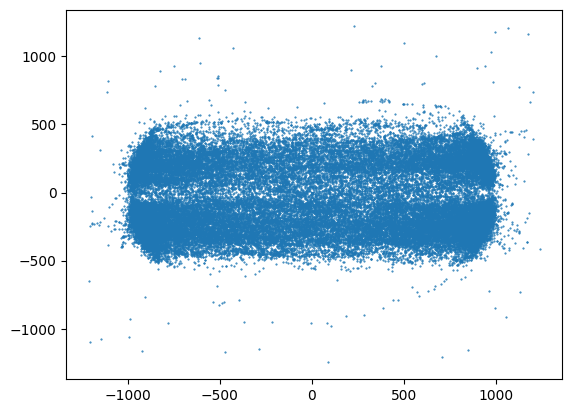

In [52]:
plt.plot(fposx,fposy,marker='.',ms=1,ls='None')
plt.show()

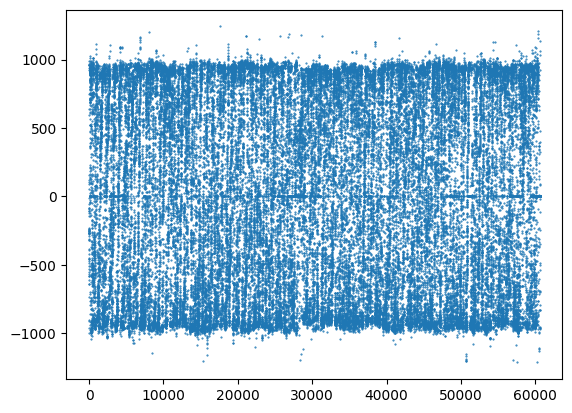

In [54]:
plt.plot(fposx,marker='.',ms=1,ls='None')
plt.show()

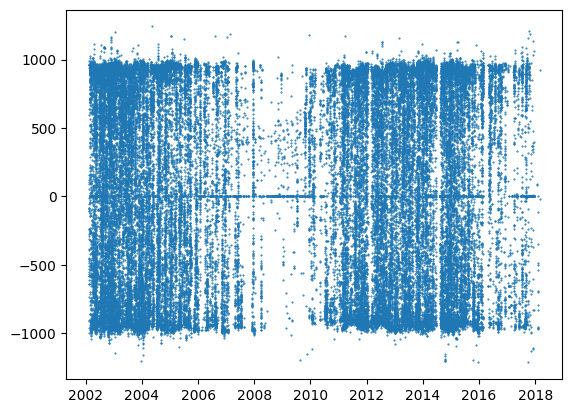

In [60]:
plt.plot(start_time.decimalyear,fposx,marker='.',ms=1,ls='None')
plt.show()